In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
cox_df = pd.read_csv('data/cox_inhibitor.tsv', sep='\t')
cox_inhibitors = ['-'.join(x.upper().split(' '))  for x in cox_df['Drug'].values]
hdac_df = pd.read_csv('data/hdac_inhibitors.csv', index_col=0)
hdac_inhibitors = ['-'.join(x.upper().split(' ')) for x in hdac_df['Drug'].values]
cdk_df = pd.read_csv('data/CDK inhibitor.txt', sep='\t')
cdk_inhibitors = ['-'.join(x.upper().split(' ')) for x in cdk_df['Name'].values]

In [8]:
ranking_dict = {
    'pvalue': {'scores': [], 'labels': []},
    'oddsRatio': {'scores': [], 'labels': []}, 
    'pvalueUp': {'scores': [], 'labels': []}, 
    'pvalueDown': {'scores': [], 'labels': []}, 
    'oddsRatioUp': {'scores': [], 'labels': []},
    'oddsRatioDown': {'scores': [], 'labels': []},
    'count' : {'scores': [], 'labels': []}
}

for metric in ranking_dict.keys():
    for term in tqdm(os.listdir('data/hdac_out')):
        rank_df = pd.read_csv(f'data/hdac_out/{term}', sep='\t', index_col=0)
        rank_df = rank_df[(rank_df['pvalue'] < 0.01)]
        rank_df['count'] = rank_df['countSignificant'] + rank_df['countInsignificant']
        if 'pvalue' in metric:
            rank_df.sort_values(by=metric, inplace=True, ascending=True)
        else:
            rank_df.sort_values(by=metric, inplace=True, ascending=False)
        rank_df.reset_index(drop=True, inplace=True)
        rank_df['labels'] = [1 if x.upper() in hdac_inhibitors else 0 for x in rank_df['drug']]
        rank_df['scores'] = 1 -  ((rank_df.index.values) / len(rank_df))
        ranking_dict[metric]['scores'].extend(list(rank_df['scores']))
        ranking_dict[metric]['labels'].extend(list(rank_df['labels']))
        

100%|██████████| 882/882 [00:10<00:00, 83.96it/s] 


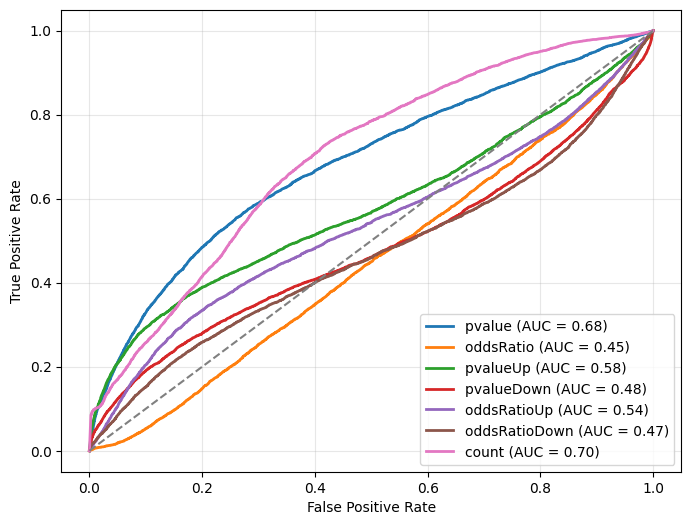

In [9]:
plt.figure(figsize=(8, 6))
for metric in ranking_dict.keys():   
    fpr, tpr, thresholds = roc_curve(ranking_dict[metric]['labels'], ranking_dict[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.savefig('data/figures/adj_pvalue_hdac.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
import os
ranking_dict_cdk = {
    'pvalue': {'scores': [], 'labels': []},
    'oddsRatio': {'scores': [], 'labels': []}, 
    'pvalueUp': {'scores': [], 'labels': []}, 
    'pvalueDown': {'scores': [], 'labels': []}, 
    'oddsRatioUp': {'scores': [], 'labels': []},
    'oddsRatioDown': {'scores': [], 'labels': []},
    'count' : {'scores': [], 'labels': []}
}

for metric in ranking_dict_cdk.keys():
    for term in tqdm(os.listdir('data/cdk_out')):
        rank_df = pd.read_csv(f'data/cdk_out/{term}', sep='\t', index_col=0)
        rank_df = rank_df[(rank_df['pvalue'] < 0.01)]
        rank_df['count'] = rank_df['countSignificant'] + rank_df['countInsignificant']
        if 'pvalue' in metric:
            rank_df.sort_values(by=metric, inplace=True, ascending=True)
        else:
            rank_df.sort_values(by=metric, inplace=True, ascending=False)
        rank_df.reset_index(drop=True, inplace=True)
        rank_df['labels'] = [1 if x.upper() in cdk_inhibitors else 0 for x in rank_df['drug']]
        rank_df['scores'] = 1 -  ((rank_df.index.values) / len(rank_df))
        ranking_dict_cdk[metric]['scores'].extend(list(rank_df['scores']))
        ranking_dict_cdk[metric]['labels'].extend(list(rank_df['labels']))

100%|██████████| 1156/1156 [00:11<00:00, 102.19it/s]


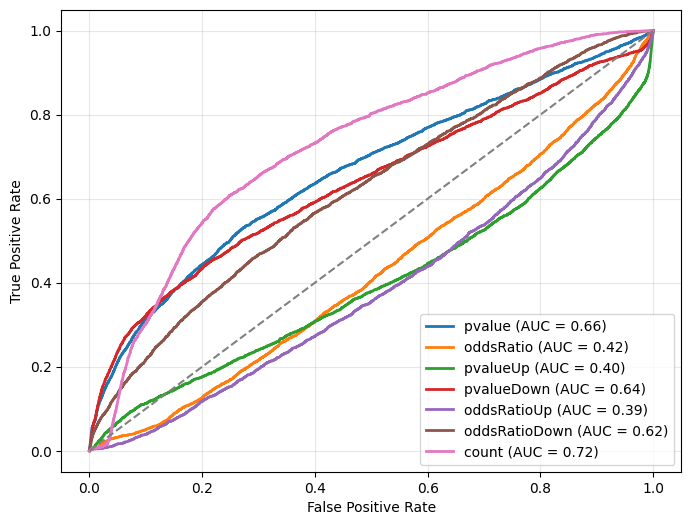

In [11]:
plt.figure(figsize=(8, 6))
for metric in ranking_dict_cdk.keys():   
    fpr, tpr, thresholds = roc_curve(ranking_dict_cdk[metric]['labels'], ranking_dict_cdk[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
#plt.xlim([0, 0.2])
#plt.ylim([0, .4])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.show()

In [12]:
crispr_hdac_ranks = {
    'pvalue': {'scores': [], 'labels': []},
    'oddsRatio': {'scores': [], 'labels': []},
    'pvalueUp': {'scores': [], 'labels': []}, 
    'pvalueDown': {'scores': [], 'labels': []}, 
    'oddsRatioUp': {'scores': [], 'labels': []},
    'oddsRatioDown': {'scores': [], 'labels': []},
    'count' : {'scores': [], 'labels': []}
}

for metric in crispr_hdac_ranks.keys():
    for term in tqdm(os.listdir('data/hdac_out')):
        rank_df = pd.read_csv(f'data/hdac_out/{term}', sep='\t', index_col=0)   
        rank_df = rank_df[rank_df['drug'].str.contains(' ')]
        rank_df = rank_df[(rank_df['pvalue'] < 0.05)]
        rank_df['count'] = rank_df['countSignificant'] + rank_df['countInsignificant']
        if 'pvalue' in metric:
            rank_df.sort_values(by=metric, inplace=True, ascending=True)
        else:
            rank_df.sort_values(by=metric, inplace=True, ascending=False)
        rank_df.reset_index(drop=True, inplace=True)
        rank_df['labels'] = [1 if 'HDAC' in x.upper() else 0 for x in rank_df['drug']]
        rank_df['scores'] = 1 -  ((rank_df.index.values) / len(rank_df))
        crispr_hdac_ranks[metric]['scores'].extend(list(rank_df['scores']))
        crispr_hdac_ranks[metric]['labels'].extend(list(rank_df['labels']))

100%|██████████| 882/882 [00:10<00:00, 81.15it/s] 


In [13]:
score_genes = {}

for term in tqdm(os.listdir('data/hdac_out')):
    rank_df = pd.read_csv(f'data/hdac_out/{term}', sep='\t', index_col=0)
    rank_df = rank_df[rank_df['drug'].str.contains(' ')]
    rank_df = rank_df[(rank_df['pvalue'] < 0.05)]
    rank_df.reset_index(drop=True, inplace=True)
    rank_df['score'] = 1 -  ((rank_df.index.values) / len(rank_df))
    for pert in rank_df['drug'].unique():
        if pert not in score_genes:
            score_genes[pert] = []
        pert_df = rank_df[rank_df['drug'] == pert]
        score_genes[pert].extend(list(pert_df['score'].values))
        


100%|██████████| 882/882 [00:17<00:00, 50.57it/s]


In [14]:
gene_data = []
for g in score_genes:
    gene_data.append([g, np.mean(score_genes[g]), np.std(score_genes[g]), len(score_genes[g])])
gene_hdac_df = pd.DataFrame(gene_data, columns=['gene', 'mean', 'std', 'num appearances']).sort_values(by='mean', ascending=False)
gene_hdac_df.set_index('gene', inplace=True)
n = len(os.listdir('data/hdac_out'))
gene_hdac_df['percent appearances'] = ((gene_hdac_df['num appearances'] / n) * 100).round(2)
display(gene_hdac_df[ gene_hdac_df.index.str.contains('HDAC')].sort_values(by='num appearances', ascending=False).head(10))

,mean,std,num appearances,percent appearances
gene,,,,
HDAC6,0.547387,0.302730,34,3.85
HDAC11,0.462879,0.289169,16,1.81
HDAC2,0.527648,0.312433,14,1.59
HDAC10,0.541388,0.270243,12,1.36
HDAC1,0.590591,0.240806,11,1.25
HDAC4,0.430611,0.291719,11,1.25
HDAC5,0.533824,0.369439,10,1.13
HDAC8,0.388629,0.364503,10,1.13
HDAC3,0.680156,0.291626,8,0.91


In [15]:
score_genes_cdk = {}

for term in tqdm(os.listdir('data/cdk_out')):
    rank_df = pd.read_csv(f'data/cdk_out/{term}', sep='\t', index_col=0)
    rank_df = rank_df[rank_df['drug'].str.contains(' ')]
    rank_df = rank_df[(rank_df['pvalue'] < 0.05)]
    rank_df.reset_index(drop=True, inplace=True)
    rank_df['score'] = 1 -  ((rank_df.index.values) / len(rank_df))
    for pert in rank_df['drug'].unique():
        if pert not in score_genes_cdk:
            score_genes_cdk[pert] = []
        pert_df = rank_df[rank_df['drug'] == pert]
        score_genes_cdk[pert].extend(list(pert_df['score'].values))

100%|██████████| 1156/1156 [00:23<00:00, 48.22it/s]


In [16]:
gene_data = []
for g in score_genes_cdk:
    gene_data.append([g, np.mean(score_genes_cdk[g]), np.std(score_genes_cdk[g]), len(score_genes_cdk[g])])
gene_cdk_df = pd.DataFrame(gene_data, columns=['gene', 'mean scaled rank', 'std', 'num appearances']).sort_values(by='mean scaled rank', ascending=False)
gene_cdk_df.set_index('gene', inplace=True)
n = len(os.listdir('data/cdk_out'))
gene_cdk_df['percent appearances'] = ((gene_cdk_df['num appearances'] / n) * 100).round(2)
display(gene_cdk_df[ gene_cdk_df.index.str.contains('CDK')].sort_values(by='num appearances', ascending=False).head(10))

,mean scaled rank,std,num appearances,percent appearances
gene,,,,
CDK2,0.423798,0.337401,177,15.31
CDK4,0.730116,0.288120,176,15.22
CDK1,0.640296,0.327977,156,13.49
CDK7,0.355222,0.315693,151,13.06
CDK6,0.571886,0.241529,68,5.88
CDK10,0.479540,0.227063,50,4.33
CDK9,0.262955,0.318461,46,3.98
CDKN2A,0.467099,0.216091,45,3.89
CDKN1A,0.513859,0.267465,43,3.72


In [17]:
gene_cdk_df.sort_values(by='num appearances', ascending=False).head(10)

,mean scaled rank,std,num appearances,percent appearances
gene,,,,
CCNA2,0.892186,0.245866,408,35.29
HSPA5,0.911278,0.199106,357,30.88
COPA,0.818899,0.250367,307,26.56
VCP,0.755986,0.305609,282,24.39
RPL19,0.748933,0.286683,248,21.45
EIF2S1,0.669792,0.329209,233,20.16
RRM1,0.781232,0.279022,229,19.81
RPL8,0.638455,0.288061,226,19.55
PSMA5,0.618254,0.304225,212,18.34


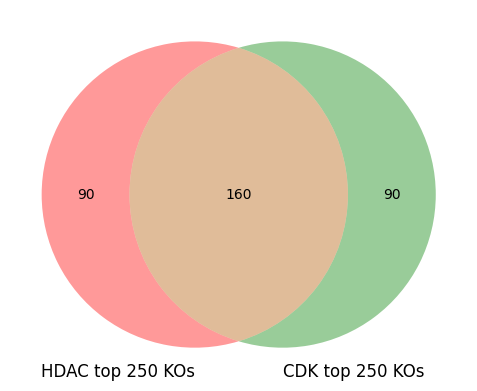

In [18]:
#gene_hdac_df[ (gene_hdac_df['num appearances'] > 10) & (gene_hdac_df['mean'] > 0.9)]
#gene_hdac_df[ (gene_hdac_df['num appearances'] > 20) & (gene_hdac_df['mean'] > 0.95)]
top_hdac = set(gene_hdac_df.sort_values(by='num appearances', ascending=False).index.values[:250])
top_cdk  = set(gene_cdk_df.sort_values(by='num appearances', ascending=False).index.values[:250])
diff_hdac = top_hdac.difference(top_cdk)
diff_cdk = top_cdk.difference(top_hdac)
intersection = top_hdac.intersection(top_cdk)

import matplotlib_venn
matplotlib_venn.venn2([top_hdac, top_cdk], set_labels=('HDAC top 250 KOs', 'CDK top 250 KOs'))
plt.savefig('venn_hdac_cdk.png', dpi=300)

In [19]:
cdk_unique = [g for g in top_cdk if g not in top_hdac]
hdac_unique = [g for g in top_hdac if g not in top_cdk]
len(cdk_unique), len(hdac_unique), len(intersection)

(90, 90, 160)

In [20]:
with open('hdac_unique.txt', 'w') as f:
    f.write('\n'.join(hdac_unique))

with open('cdk_unique.txt', 'w') as f:
    f.write('\n'.join(cdk_unique))

with open('intersection.txt', 'w') as f:
    f.write('\n'.join(intersection))

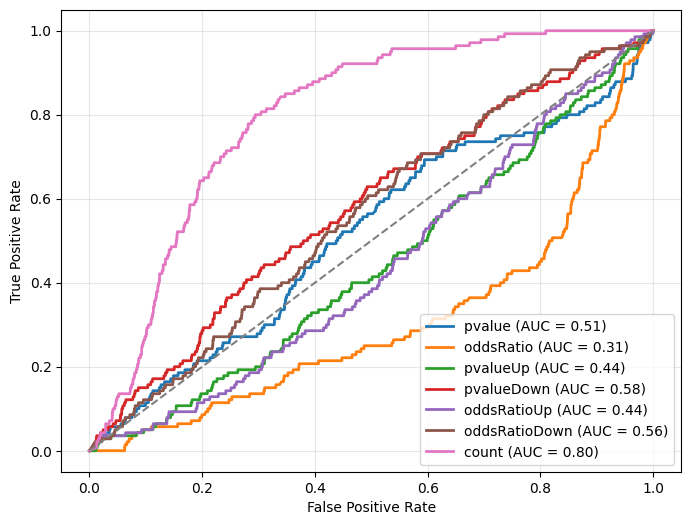

In [21]:
plt.figure(figsize=(8, 6))
for metric in crispr_hdac_ranks.keys():   
    fpr, tpr, thresholds = roc_curve(crispr_hdac_ranks[metric]['labels'], crispr_hdac_ranks[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.show()

In [22]:
crispr_cdk_ranks = {
    'pvalue': {'scores': [], 'labels': []},
    'oddsRatio': {'scores': [], 'labels': []},
    'pvalueUp': {'scores': [], 'labels': []}, 
    'pvalueDown': {'scores': [], 'labels': []}, 
    'oddsRatioUp': {'scores': [], 'labels': []},
    'oddsRatioDown': {'scores': [], 'labels': []}
}

for metric in crispr_cdk_ranks.keys():
    for term in tqdm(os.listdir('data/cdk_out')):
        rank_df = pd.read_csv(f'data/cdk_out/{term}', sep='\t', index_col=0)   
        rank_df = rank_df[rank_df['drug'].str.contains(' ')]
        rank_df = rank_df[(rank_df['pvalue'] < 0.05)]
        if 'pvalue' in metric:
            rank_df.sort_values(by=metric, inplace=True, ascending=True)
        else:
            rank_df.sort_values(by=metric, inplace=True, ascending=False)
        rank_df.reset_index(drop=True, inplace=True)
        rank_df['labels'] = [1 if 'CDK' in x.upper() else 0 for x in rank_df['drug']]
        rank_df['scores'] = 1 -  ((rank_df.index.values) / len(rank_df))
        crispr_cdk_ranks[metric]['scores'].extend(list(rank_df['scores']))
        crispr_cdk_ranks[metric]['labels'].extend(list(rank_df['labels']))

100%|██████████| 1156/1156 [00:12<00:00, 90.86it/s] 


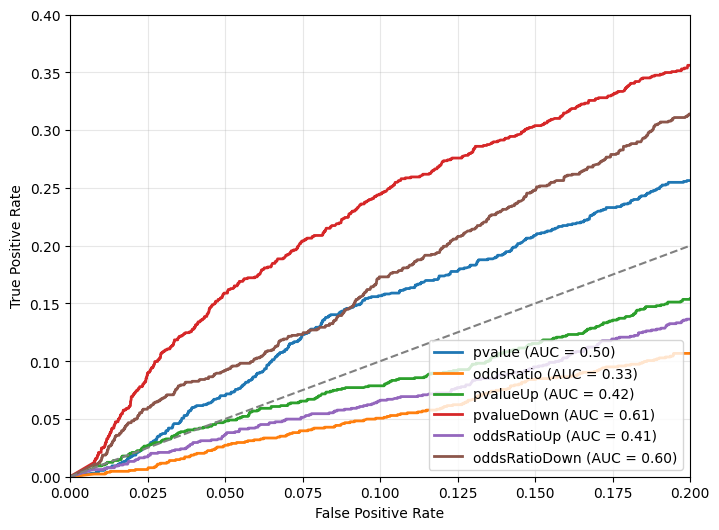

In [23]:
plt.figure(figsize=(8, 6))
for metric in crispr_cdk_ranks.keys():   
    fpr, tpr, thresholds = roc_curve(crispr_cdk_ranks[metric]['labels'], crispr_cdk_ranks[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
plt.ylim([0, .4])
plt.xlim([0, 0.2])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.show()

In [24]:
hdac_term_search = pd.read_csv('data/results (10).tsv', sep='\t')
cdk_term_search = pd.read_csv('data/results (9).tsv', sep='\t')

In [25]:
hdac_term_search['KO'] = hdac_term_search['term'].map(lambda x: x.split('_')[4])
hdac_term_search = hdac_term_search[hdac_term_search['KO'].str.contains(' ')]
hdac_term_search['KO'] = hdac_term_search['KO'].map(lambda x: x.split(' ')[0])
hdac_kos = hdac_term_search['KO'].values
set(hdac_kos)

{'HDAC1',
 'HDAC10',
 'HDAC11',
 'HDAC2',
 'HDAC3',
 'HDAC4',
 'HDAC5',
 'HDAC6',
 'HDAC7',
 'HDAC8',
 'HDAC9'}

In [26]:
cdk_term_search['KO'] = cdk_term_search['term'].map(lambda x: x.split('_')[4])
cdk_term_search = cdk_term_search[cdk_term_search['KO'].str.contains(' ')]
cdk_term_search['KO'] = cdk_term_search['KO'].map(lambda x: x.split(' ')[0])
cdk_kos = cdk_term_search['KO'].values

In [27]:
import pyenrichr as pye

In [28]:
fisher = pye.enrichment.FastFisher(34000)

# load a gene set library
mean_sig_crispr = {}
mean_sig_chem = {}
with open('data/LINCS_L1000_Chem_Pert_Consensus_Sigs.txt') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split('\t')
        mean_sig_chem[line[0]] = set(line[2:])

with open('data/LINCS_L1000_CRISPR_KO_Consensus_Sigs.txt') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split('\t')
        mean_sig_chem[line[0]] = set(line[2:])

In [40]:
import json
with open('../data/counts_perts.json') as f: 
    counts_perts = json.load(f)

def map_term_to_count(term):
    if term in counts_perts:
        return counts_perts[term]
    elif term.upper() in counts_perts:
        return counts_perts[term.upper()]
    elif term.lower() in counts_perts:
        return counts_perts[term.lower()]
    elif term.capitalize() in counts_perts:
        return counts_perts[term.capitalize()]
    else:
        0
    

In [42]:
from tqdm import tqdm


ranking_dict_mean_sigs = {
    'p-value': {'scores': [], 'labels': []},
    'odds': {'scores': [], 'labels': []},
    'count': {'scores': [], 'labels': []}
}
hdac_sigs = {}
with open('data/hdac_inhibitor.gmt') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split('\t')
        hdac_sigs[line[0]] = line[2:]
    
for sig in tqdm(hdac_sigs):
    rank_df = pye.enrichment.fisher([g.upper() for g in hdac_sigs[sig]], mean_sig_chem, fisher=fisher)
    rank_df = rank_df[(rank_df['p-value'] < 0.01)]
    rank_df['count'] = rank_df['term'].map(lambda x: map_term_to_count(x.split()[0]))
    for metric in ranking_dict_mean_sigs.keys():
        if 'p-value' in metric:
            rank_df.sort_values(by=metric, inplace=True, ascending=True)
        else:
            rank_df.sort_values(by=metric, inplace=True, ascending=False)
        rank_df.reset_index(drop=True, inplace=True)
        rank_df['labels'] = [1 if x.split()[0].upper() in hdac_inhibitors else 0 for x in rank_df['term']]
        rank_df['scores'] = 1 -  ((rank_df.index.values) / len(rank_df))
        ranking_dict_mean_sigs[metric]['scores'].extend(list(rank_df['scores']))
        ranking_dict_mean_sigs[metric]['labels'].extend(list(rank_df['labels']))
        

100%|██████████| 1036/1036 [03:42<00:00,  4.65it/s]


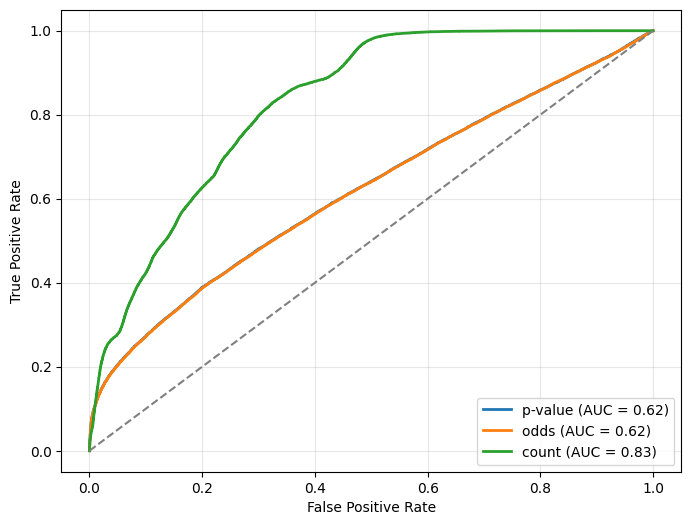

In [43]:
plt.figure(figsize=(8, 6))
for metric in ranking_dict_mean_sigs.keys():   
    fpr, tpr, thresholds = roc_curve(ranking_dict_mean_sigs[metric]['labels'], ranking_dict_mean_sigs[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
#plt.ylim([0, .4])
#plt.xlim([0, 0.2])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.show()

In [44]:
from tqdm import tqdm

ranking_dict_mean_sigs_cdk = {
    'p-value': {'scores': [], 'labels': []},
    'odds': {'scores': [], 'labels': []}, 
    'count': {'scores': [], 'labels': []}
}
cdk_sigs = {}
with open('data/cdk_inhibitor.gmt') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split('\t')
        cdk_sigs[line[0]] = line[2:]
    

for sig in tqdm(cdk_sigs):
    rank_df = pye.enrichment.fisher([g.upper() for g in cdk_sigs[sig]], mean_sig_chem, fisher=fisher)
    rank_df = rank_df[(rank_df['p-value'] < 0.01)]
    rank_df['count'] = rank_df['term'].map(lambda x: map_term_to_count(x.split()[0]))
    for metric in ranking_dict_mean_sigs_cdk.keys():
        if 'p-value' in metric:
            rank_df.sort_values(by=metric, inplace=True, ascending=True)
        else:
            rank_df.sort_values(by=metric, inplace=True, ascending=False)
        rank_df.reset_index(drop=True, inplace=True)
        rank_df['labels'] = [1 if x.split()[0].upper() in cdk_inhibitors else 0 for x in rank_df['term']]
        rank_df['scores'] = 1 -  ((rank_df.index.values) / len(rank_df))
        ranking_dict_mean_sigs_cdk[metric]['scores'].extend(list(rank_df['scores']))
        ranking_dict_mean_sigs_cdk[metric]['labels'].extend(list(rank_df['labels']))      

100%|██████████| 1342/1342 [05:38<00:00,  3.97it/s]


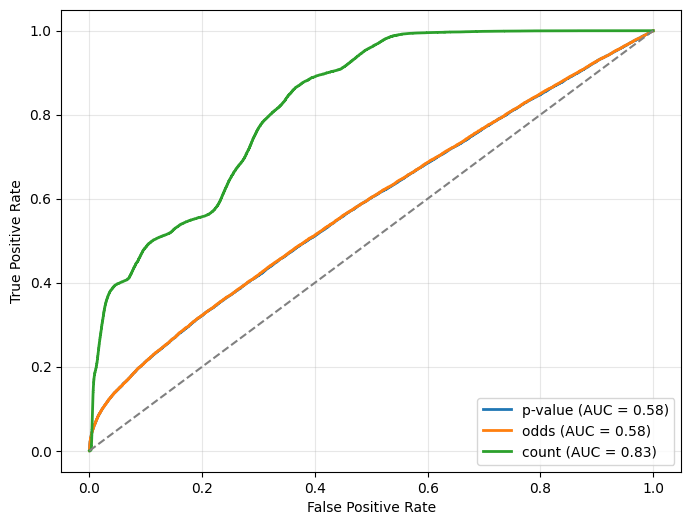

In [45]:
plt.figure(figsize=(8, 6))
for metric in ranking_dict_mean_sigs_cdk.keys():   
    fpr, tpr, thresholds = roc_curve(ranking_dict_mean_sigs_cdk[metric]['labels'], ranking_dict_mean_sigs_cdk[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
#plt.ylim([0, .4])
#plt.xlim([0, 0.2])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.show()

In [ ]:
from tqdm import tqdm

ranking_dict_crispr_cdk = {
    'p-value': {'scores': [], 'labels': []},
    'odds': {'scores': [], 'labels': []}, 
}
cdk_sigs = {}
with open('data/cdk_inhibitor.gmt') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip().split('\t')
        cdk_sigs[line[0]] = line[2:]
    
metric = 'p-value'
for sig in tqdm(cdk_sigs):
    rank_df = pye.enrichment.fisher([g.upper() for g in cdk_sigs[sig]], mean_sig_chem, fisher=fisher)
    rank_df = rank_df[(rank_df['p-value'] < 0.01)]
    rank_df.sort_values(by=metric, inplace=True, ascending=True)
    rank_df.reset_index(drop=True, inplace=True)
    rank_df['labels'] = [1 if x.split()[0].upper() in cdk_kos else 0 for x in rank_df['term']]
    rank_df['scores'] = 1 -  ((rank_df.index.values) / len(rank_df))
    ranking_dict_crispr_cdk[metric]['scores'].extend(list(rank_df['scores']))
    ranking_dict_crispr_cdk[metric]['labels'].extend(list(rank_df['labels']))      

In [ ]:
ranking_dict_crispr_hdac = {
    'p-value': {'scores': [], 'labels': []},
    'odds': {'scores': [], 'labels': []}, 
}

metric = 'p-value'
for sig in tqdm(hdac_sigs):
    rank_df = pye.enrichment.fisher([g.upper() for g in hdac_sigs[sig]], mean_sig_chem, fisher=fisher)
    rank_df = rank_df[(rank_df['p-value'] < 0.01)]
    if 'p-value' in metric:
        rank_df.sort_values(by=metric, inplace=True, ascending=True)
    else:
        rank_df.sort_values(by=metric, inplace=True, ascending=False)
    rank_df.reset_index(drop=True, inplace=True)
    rank_df['labels'] = [1 if x.split()[0].upper() in hdac_kos else 0 for x in rank_df['term']]
    rank_df['scores'] = 1 -  ((rank_df.index.values) / len(rank_df))
    ranking_dict_crispr_hdac[metric]['scores'].extend(list(rank_df['scores']))
    ranking_dict_crispr_hdac[metric]['labels'].extend(list(rank_df['labels']))
    

100%|██████████| 1036/1036 [11:56<00:00,  1.45it/s]


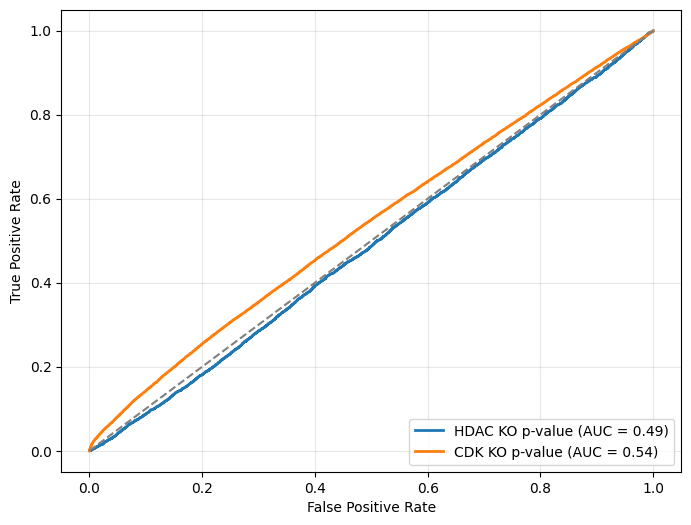

In [ ]:
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(ranking_dict_crispr_hdac['p-value']['labels'], ranking_dict_crispr_hdac['p-value']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'HDAC KO {metric} (AUC = {roc_auc:.2f})')
fpr, tpr, thresholds = roc_curve(ranking_dict_crispr_cdk['p-value']['labels'], ranking_dict_crispr_cdk['p-value']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'CDK KO {metric} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

#plt.ylim([0, .4])
#plt.xlim([0, 0.2])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.show()

In [47]:
hdac_mw = {'pvalue': {'scores': [], 'labels': []}, 'count': {'scores': [], 'labels': []}}
for f in tqdm(os.listdir('data/l1000_ranker/hdac_mw')):
    if 'mimickers_' not in f and 'reversers_' not in f:
        df = pd.read_csv(f'data/l1000_ranker/hdac_mw/{f}', sep='\t', index_col=0)
        df = df[df['p-value'] < 0.01]
        df.sort_values(by='p-value', inplace=True, ascending=True)
        df.index.name = 'term'
        df.reset_index(drop=False, inplace=True)
        df['labels'] = [1 if x.split()[0].upper() in hdac_inhibitors else 0 for x in df['term']]
        df['scores'] = 1 -  ((df.index.values) / len(df))
        hdac_mw['pvalue']['scores'].extend(list(df['scores']))
        hdac_mw['pvalue']['labels'].extend(list(df['labels']))
        df.sort_values(by='count', inplace=True, ascending=False)
        df.reset_index(drop=True, inplace=True)
        df['labels'] = [1 if x.split()[0].upper() in hdac_inhibitors else 0 for x in df['term']]
        df['scores'] = 1 -  ((df.index.values) / len(df))
        hdac_mw['count']['scores'].extend(list(df['scores']))
        hdac_mw['count']['labels'].extend(list(df['labels']))

100%|██████████| 1527/1527 [00:05<00:00, 267.63it/s]


In [48]:
cdk_mw = {'pvalue': {'scores': [], 'labels': []}, 'count': {'scores': [], 'labels': []}}
for f in tqdm(os.listdir('data/l1000_ranker/cdk_mw')):
    if 'mimickers_' not in f and 'reversers_' not in f:
        df = pd.read_csv(f'data/l1000_ranker/cdk_mw/{f}', sep='\t', index_col=0)
        df = df[df['p-value'] < 0.01]
        df.sort_values(by='p-value', inplace=True, ascending=True)
        df.index.name = 'term'
        df.reset_index(drop=False, inplace=True)
        df['labels'] = [1 if x.split()[0].upper() in cdk_inhibitors else 0 for x in df['term']]
        df['scores'] = 1 -  ((df.index.values) / len(df))
        cdk_mw['pvalue']['scores'].extend(list(df['scores']))
        cdk_mw['pvalue']['labels'].extend(list(df['labels']))
        df.sort_values(by='count', inplace=True, ascending=False)
        df.reset_index(drop=True, inplace=True)
        df['labels'] = [1 if x.split()[0].upper() in cdk_inhibitors else 0 for x in df['term']]
        df['scores'] = 1 -  ((df.index.values) / len(df))
        cdk_mw['count']['scores'].extend(list(df['scores']))
        cdk_mw['count']['labels'].extend(list(df['labels']))
        

100%|██████████| 1983/1983 [00:06<00:00, 285.03it/s]


In [ ]:
cdk_ks = {'scores': [], 'labels': []}
for f in tqdm(os.listdir('data/l1000_ranker/cdk_mw')):
    if 'mimickers_' not in f and 'reversers_' not in f:
        df = pd.read_csv(f'data/l1000_ranker/cdk_mw/{f}', sep='\t', index_col=0)
        df = df[df['p-value'] < 0.01]
        df.sort_values(by='p-value', inplace=True, ascending=True)
        df.index.name = 'term'
        df.reset_index(drop=False, inplace=True)
        df['labels'] = [1 if x.split()[0].upper() in cdk_inhibitors else 0 for x in df['term']]
        df['scores'] = 1 -  ((df.index.values) / len(df))
        cdk_mw['scores'].extend(list(df['scores']))
        cdk_mw['labels'].extend(list(df['labels']))

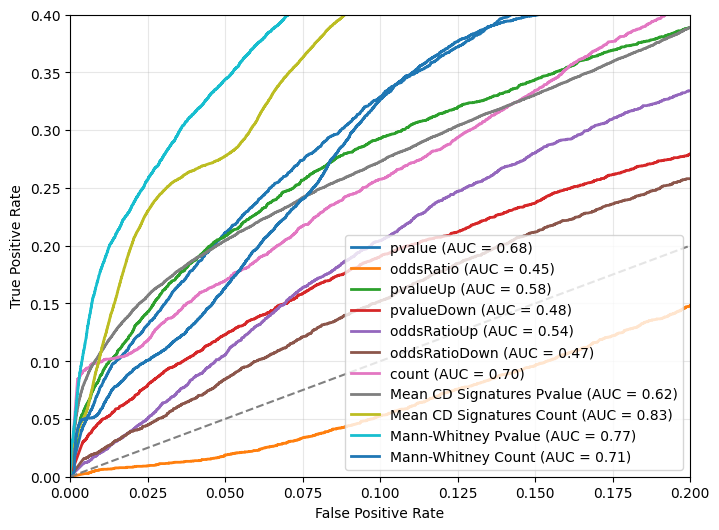

In [57]:
plt.figure(figsize=(8, 6))
for metric in ranking_dict.keys():   
    fpr, tpr, thresholds = roc_curve(ranking_dict[metric]['labels'], ranking_dict[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')
    
fpr, tpr, thresholds = roc_curve(ranking_dict_mean_sigs['p-value']['labels'], ranking_dict_mean_sigs['p-value']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mean CD Signatures Pvalue (AUC = {roc_auc:.2f})')
fpr, tpr, thresholds = roc_curve(ranking_dict_mean_sigs['count']['labels'], ranking_dict_mean_sigs['count']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mean CD Signatures Count (AUC = {roc_auc:.2f})')

fpr, tpr, thresholds = roc_curve(hdac_mw['pvalue']['labels'], hdac_mw['pvalue']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mann-Whitney Pvalue (AUC = {roc_auc:.2f})')
fpr, tpr, thresholds = roc_curve(hdac_mw['count']['labels'], hdac_mw['count']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mann-Whitney Count (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.xlim([0, 0.2])
plt.ylim([0, .4])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.savefig('data/figures/adj_pvalue_hdac.png', dpi=300, bbox_inches='tight')
plt.show()

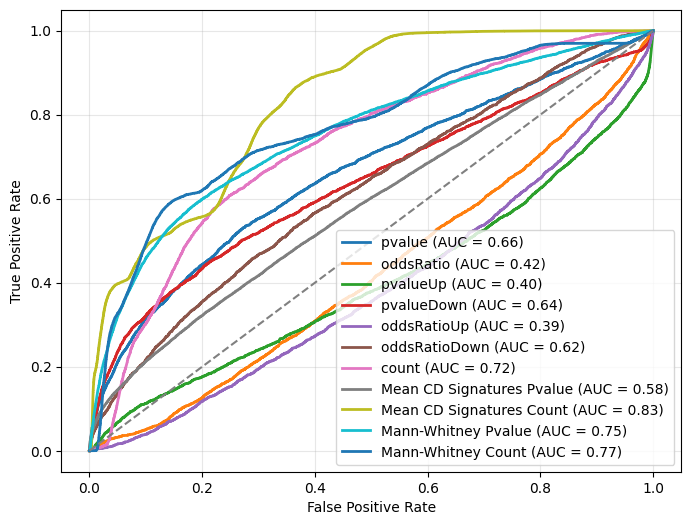

In [56]:
plt.figure(figsize=(8, 6))
for metric in ranking_dict_cdk.keys():   
    fpr, tpr, thresholds = roc_curve(ranking_dict_cdk[metric]['labels'], ranking_dict_cdk[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')
    
fpr, tpr, thresholds = roc_curve(ranking_dict_mean_sigs_cdk['p-value']['labels'], ranking_dict_mean_sigs_cdk['p-value']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mean CD Signatures Pvalue (AUC = {roc_auc:.2f})')
fpr, tpr, thresholds = roc_curve(ranking_dict_mean_sigs_cdk['count']['labels'], ranking_dict_mean_sigs_cdk['count']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mean CD Signatures Count (AUC = {roc_auc:.2f})')

fpr, tpr, thresholds = roc_curve(cdk_mw['pvalue']['labels'], cdk_mw['pvalue']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mann-Whitney Pvalue (AUC = {roc_auc:.2f})')
fpr, tpr, thresholds = roc_curve(cdk_mw['count']['labels'], cdk_mw['count']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mann-Whitney Count (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
#plt.xlim([0, 0.2])
#plt.ylim([0, .4])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.savefig('data/figures/adj_pvalue_hdac.png', dpi=300, bbox_inches='tight')
plt.show()

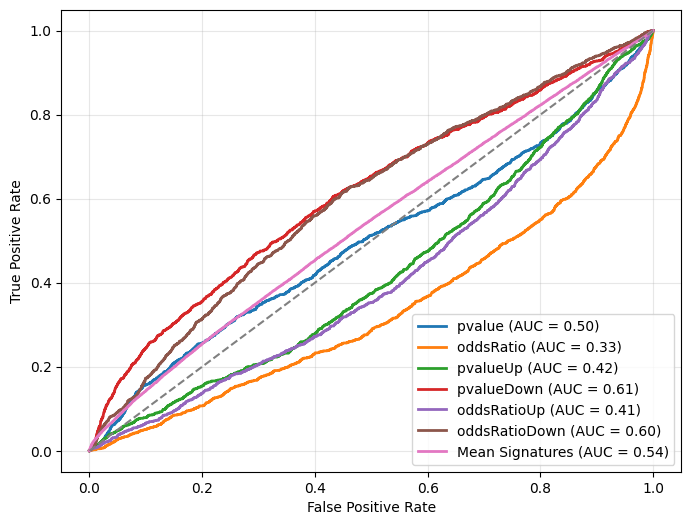

In [ ]:
plt.figure(figsize=(8, 6))
for metric in crispr_cdk_ranks.keys():   
    fpr, tpr, thresholds = roc_curve(crispr_cdk_ranks[metric]['labels'], crispr_cdk_ranks[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')

fpr, tpr, thresholds = roc_curve(ranking_dict_crispr_cdk['p-value']['labels'], ranking_dict_crispr_cdk['p-value']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mean Signatures (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.ylim([0, .4])
plt.xlim([0, 0.2])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.show()

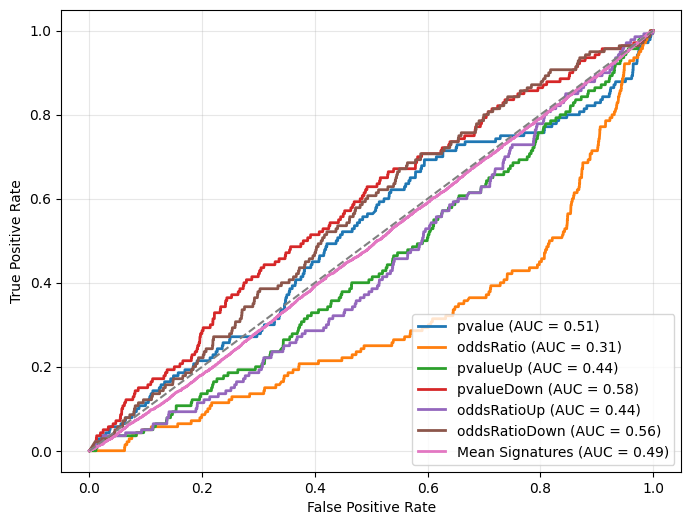

In [ ]:
plt.figure(figsize=(8, 6))
for metric in crispr_hdac_ranks.keys():   
    fpr, tpr, thresholds = roc_curve(crispr_hdac_ranks[metric]['labels'], crispr_hdac_ranks[metric]['scores'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{metric} (AUC = {roc_auc:.2f})')

fpr, tpr, thresholds = roc_curve(ranking_dict_crispr_hdac['p-value']['labels'], ranking_dict_crispr_hdac['p-value']['scores'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label=f'Mean Signatures (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
#plt.ylim([0, .4])
#plt.xlim([0, 0.2])
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.show()